In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pickle
from matplotlib.pyplot import cm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
exp_name = 'res/linear_regression_'
res_ = pickle.load(open(exp_name+'-res.p', 'rb'))
locals().update(res_)

In [4]:
means_unwgt = np.mean(original_regrets_,axis=2)
stds_unwgt = np.std(original_regrets_,axis=2)
means_wgt = np.mean(reweighted_regrets_,axis=2)
stds_wgt = np.std(reweighted_regrets_,axis=2)

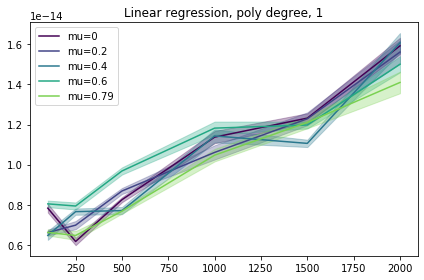

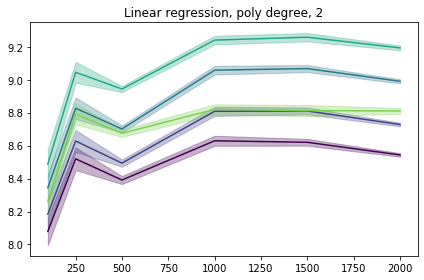

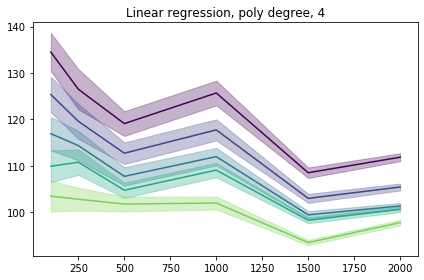

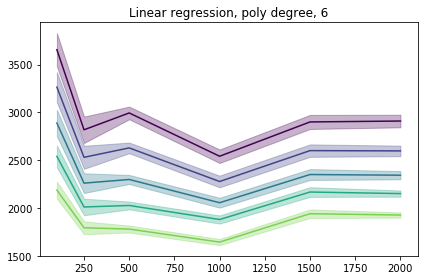

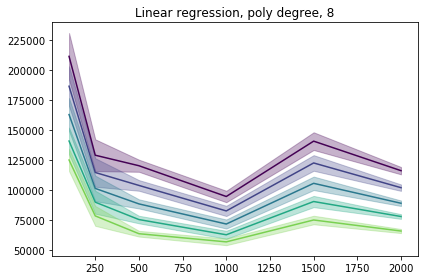

In [11]:
model='Linear regression'; model_fn = 'lr'
[n_misspec, n_wghts, n_reps] = original_regrets_.shape
polykernel_degree_vec = [1, 2, 4, 6, 8]

color=cm.viridis(np.linspace(0,1,n_misspec+1))

for misspec_ind in range(n_misspec):
    plt.figure()
    plt.plot(N_s,means_unwgt[misspec_ind, :],label='mu=0',color=color[0])
    plt.fill_between(N_s,means_unwgt[misspec_ind, :]-stds_unwgt[misspec_ind, :]*1.0/n_reps,
                    means_unwgt[misspec_ind, :]+stds_unwgt[misspec_ind, :]*1.0/n_reps,
                    alpha=0.3,color=color[0])
    
    for k in range(len(mixture_weights)-1): 
        plt.plot(N_s,means_wgt[misspec_ind, :, k],label='mu='+str(np.round(mixture_weights[k],2)),color=color[k+1])
        plt.fill_between(N_s,means_wgt[misspec_ind, :,k]-stds_wgt[misspec_ind, :,k]*1.0/n_reps,
                    means_wgt[misspec_ind, :,k]+stds_wgt[misspec_ind, :,k]*1.0/n_reps,
                    alpha=0.3,color=color[k+1])        
        plt.title(model+', poly degree, '+str(polykernel_degree_vec[misspec_ind]))
    if misspec_ind==0: plt.legend()
#     plt.yscale('log')
    plt.tight_layout()
    plt.savefig('figs/'+model_fn+'-misspec-'+str(misspec_ind)+'.pdf', bbox_to_inches='tight')

In [13]:
res_.keys()

dict_keys(['original_regrets_', 'reweighted_regrets_', 'data_params', 'N_s', 'mixture_weights'])